# Replicability of multivariate BWAS - figures

## Plots from this notebook are saved into the directory `fig` and aggregated into two main figures:
- `fig/cv_vs_overfit.[svg|pdf|png]`
- `fig/replication_probability.[svg|pdf|png]`

### Imports

In [455]:
import math
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={"figure.figsize":(3, 3)})
sns.set_style("white")

# Define Plotting function
This function takes a dataframe created in the notebook `multivariate_BWAS_replicability_analysis.ipynb`
and recreates the "Replication plots" from the target paper (Fig.4) for a given target variable and feature set.

In [474]:
def plot(target, feature, df, alpha=0.05, cv_only=True, filetag=None, ylim=None, xlim=None):
    sns.set(rc={"figure.figsize":(3, 3)})
    sns.set_style("white")
    tmp = df.loc[(df.target==target) & (df.connectivity==feature)]
    if not cv_only:
        sns.scatterplot(x='r_replication', y='r_discovery_overfit', hue='n', data=tmp, palette='Greens_r', linewidth=0, hue_norm=(0,tmp.n.max()*1.5))
        sns.scatterplot(x=[tmp.loc[tmp.n==200, 'r_replication'].mean()], y=[tmp.loc[tmp.n==200, 'r_discovery_overfit'].mean()], color='red')
        sns.scatterplot(x=[tmp.loc[tmp.n==tmp.n.max(), 'r_replication'].mean()], y=[tmp.loc[tmp.n==tmp.n.max(), 'r_discovery_overfit'].mean()], color='purple').set(title='Discovery without CV (overfit)')
        plt.axhline(0.088, linestyle='dotted')
        plt.axvline(0.088, linestyle='dotted')
        plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)
        if ylim:
            plt.ylim(ylim)
        if xlim:
            plt.xlim(xlim)
        sns.despine()
        if filetag:
            plt.savefig('fig/overfit_scatter_' + target + '_' + feature + '_' + filetag + '.pdf')
        plt.show()

        for n in tmp.n.unique():
            tmp2 = tmp[tmp.n == n]

            if (tmp2['p_discovery_overfit']<alpha).sum() == 0:
                replication_prob = 'no discovery'
            else:
                 #      #(significant replications among significant discoveries)     / # significant discoveries
                replication_prob = (tmp2.loc[tmp2['p_discovery_overfit']<alpha,'p_replication']<alpha).sum() / (tmp2['p_discovery_overfit']<alpha).sum() * 100
                print("Replication probability at n =", n, ':', replication_prob, '%')
        
    sns.scatterplot(x='r_replication', y='r_discovery_cv', hue='n', data=tmp, palette='Greens_r', linewidth=0, hue_norm=(0,tmp.n.max()*1.5))
    sns.scatterplot(x=[tmp.loc[tmp.n==200, 'r_replication'].mean()], y=[tmp.loc[tmp.n==200, 'r_discovery_cv'].mean()], color='red')
    sns.scatterplot(x=[tmp.loc[tmp.n==tmp.n.max(), 'r_replication'].mean()], y=[tmp.loc[tmp.n==tmp.n.max(), 'r_discovery_cv'].mean()], color='purple').set(title='Discovery with CV')
    plt.axhline(0.088, linestyle='dotted')
    plt.axvline(0.088, linestyle='dotted')
    plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)
    if ylim:
        plt.ylim(ylim)
    if xlim:
        plt.xlim(xlim)
    sns.despine()
    if filetag:
        plt.savefig('fig/scatter_' + target + '_' + feature + '_' + filetag + '.pdf')
    plt.show()

    for n in tmp.n.unique():
        tmp2 = tmp[tmp.n == n]

        if (tmp2['p_discovery_cv']<alpha).sum() == 0:
            replication_prob = 'no discovery'
        else:
             #      #(significant replications among significant discoveries)     / # significant discoveries
            replication_prob = (tmp2.loc[tmp2['p_discovery_cv']<alpha,'p_replication']<alpha).sum() / (tmp2['p_discovery_cv']<alpha).sum() * 100

        print("Replication probability at n =", n, ':', replication_prob, '%')

    return {'r_rep_200': tmp.loc[tmp.n==200, 'r_replication'].mean(),
            'r_rep_max': tmp.loc[tmp.n==tmp.n.max(), 'r_replication'].mean()}


## Possible targets:
'age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'Flanker_AgeAdj', 'CardSort_AgeAdj', 'PicSeq_AgeAdj'
## Possible features
'netmats_parcor', 'netmats_pearson'

# Cognitive ability, PCA+SVR, pearson correlation
This basically reproduces Fig. 4 of the target paper with a highly similar methodology.

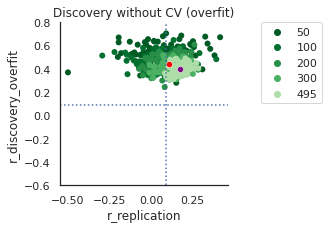

Replication probability at n = 50 : 11.0 %
Replication probability at n = 100 : 17.0 %
Replication probability at n = 200 : 43.0 %
Replication probability at n = 300 : 72.0 %
Replication probability at n = 495 : 100.0 %


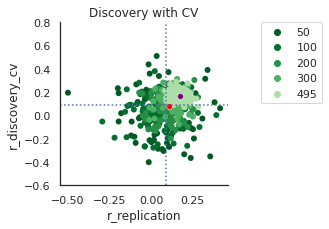

Replication probability at n = 50 : no discovery %
Replication probability at n = 100 : 0.0 %
Replication probability at n = 200 : 25.0 %
Replication probability at n = 300 : 62.16216216216216 %
Replication probability at n = 495 : 100.0 %


{'r_rep_200': 0.10612941902239685, 'r_rep_max': 0.17595802104381736}

In [477]:
df = pd.read_csv('results_PCA_SVR.csv')
plot(target='CogTotalComp_AgeAdj', feature='netmats_pearson', df=df, cv_only=False, filetag='PCA-SVR_ylim', ylim=(-0.6,0.8))

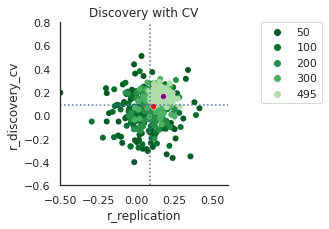

Replication probability at n = 50 : no discovery %
Replication probability at n = 100 : 0.0 %
Replication probability at n = 200 : 25.0 %
Replication probability at n = 300 : 62.16216216216216 %
Replication probability at n = 495 : 100.0 %


{'r_rep_200': 0.10612941902239685, 'r_rep_max': 0.17595802104381736}

In [479]:

plot(target='CogTotalComp_AgeAdj', feature='netmats_pearson', df=df, cv_only=True, filetag='PCA-SVR', ylim=(-0.6,0.8), xlim=(-0.5, 0.6))

# Cognitive ability, PCA+SVR, partial correlation

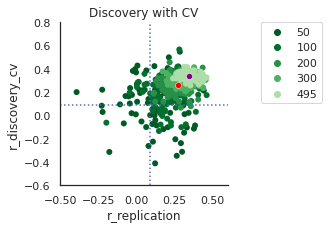

Replication probability at n = 50 : no discovery %
Replication probability at n = 100 : 90.9090909090909 %
Replication probability at n = 200 : 100.0 %
Replication probability at n = 300 : 100.0 %
Replication probability at n = 495 : 100.0 %


{'r_rep_200': 0.2713589974517626, 'r_rep_max': 0.34611199458096925}

In [480]:
df = pd.read_csv('results_PCA_SVR.csv')
plot(target='CogTotalComp_AgeAdj', feature='netmats_parcor', df=df, filetag='PCA-SVR', ylim=(-0.6,0.8), xlim=(-0.5, 0.6))

# Cognitive ability, Ridge, pearson correlation

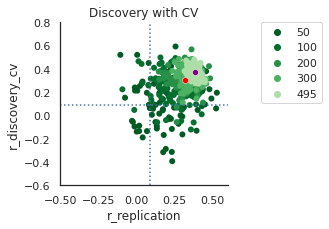

Replication probability at n = 50 : 40.625 %
Replication probability at n = 100 : 78.66666666666666 %
Replication probability at n = 200 : 100.0 %
Replication probability at n = 300 : 100.0 %
Replication probability at n = 495 : 100.0 %


{'r_rep_200': 0.31597434384989187, 'r_rep_max': 0.38191979503949747}

In [481]:
df = pd.read_csv('results_Ridge.csv')
plot(target='CogTotalComp_AgeAdj', feature='netmats_pearson', df=df, filetag='Ridge', ylim=(-0.6,0.8), xlim=(-0.5, 0.6))

# Cognitive ability, Ridge, partial correlation

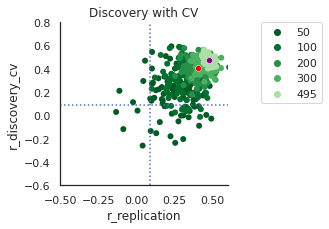

Replication probability at n = 50 : 64.86486486486487 %
Replication probability at n = 100 : 97.5 %
Replication probability at n = 200 : 100.0 %
Replication probability at n = 300 : 100.0 %
Replication probability at n = 495 : 100.0 %


{'r_rep_200': 0.4062055329971098, 'r_rep_max': 0.47903946590450225}

In [482]:
df = pd.read_csv('results_Ridge.csv')
plot(target='CogTotalComp_AgeAdj', feature='netmats_parcor', df=df, filetag='Ridge', ylim=(-0.6,0.8), xlim=(-0.5, 0.6))

# Inflation histograms

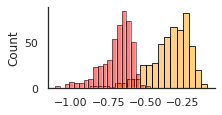

In [462]:
sns.set(rc={"figure.figsize":(3, 1.5)})
sns.set_style("white")
df = pd.read_csv('results_PCA_SVR.csv')
tmp = df.loc[(df.target=='CogTotalComp_AgeAdj') & (df.connectivity=='netmats_pearson')]
sns.histplot(tmp.r_replication - tmp.r_discovery_overfit, color='orange', alpha=0.5)
sns.histplot(tmp.r_replication - tmp.r_discovery_overfit, color='black',fill=False)


df = pd.read_csv('results_Ridge.csv')
tmp = df.loc[(df.target=='CogTotalComp_AgeAdj') & (df.connectivity=='netmats_pearson')]
sns.histplot(tmp.r_replication - tmp.r_discovery_overfit, color='red', alpha=0.5)
sns.histplot(tmp.r_replication - tmp.r_discovery_overfit, color='black',fill=False)
sns.despine()

plt.savefig('fig/hist_inflation_overfit.pdf')
plt.show()

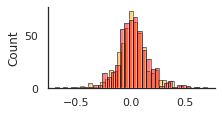

In [464]:
sns.set(rc={"figure.figsize":(3, 1.5)})
sns.set_style("white")
df = pd.read_csv('results_PCA_SVR.csv')
tmp = df.loc[(df.target=='CogTotalComp_AgeAdj') & (df.connectivity=='netmats_pearson')]
sns.histplot(tmp.r_replication - tmp.r_discovery_cv, color='orange', alpha=0.5)
sns.histplot(tmp.r_replication - tmp.r_discovery_cv, color='black',fill=False)


df = pd.read_csv('results_Ridge.csv')
tmp = df.loc[(df.target=='CogTotalComp_AgeAdj') & (df.connectivity=='netmats_pearson')]
sns.histplot(tmp.r_replication - tmp.r_discovery_cv, color='red', alpha=0.5)
sns.histplot(tmp.r_replication - tmp.r_discovery_cv, color='black',fill=False)
sns.despine()

plt.savefig('fig/hist_inflation_cv.pdf')
plt.show()

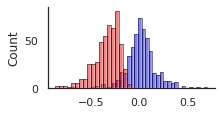

In [465]:
sns.set(rc={"figure.figsize":(3, 1.5)})
sns.set_style("white")
df = pd.read_csv('results_PCA_SVR.csv')
tmp = df.loc[(df.target=='CogTotalComp_AgeAdj') & (df.connectivity=='netmats_pearson')]
sns.histplot(tmp.r_replication - tmp.r_discovery_cv, color='blue', alpha=0.5)
sns.histplot(tmp.r_replication - tmp.r_discovery_cv, color='black',fill=False)

tmp = df.loc[(df.target=='CogTotalComp_AgeAdj') & (df.connectivity=='netmats_pearson')]
sns.histplot(tmp.r_replication - tmp.r_discovery_overfit, color='red', alpha=0.5)
sns.histplot(tmp.r_replication - tmp.r_discovery_overfit, color='black',fill=False)
sns.despine()

plt.savefig('fig/hist_inflation_cv_vs_overfit.pdf')
plt.show()

# False positives with biased and unbiased estimates
 Evaluated via a null model

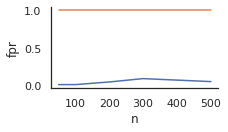

In [466]:
sns.set(rc={"figure.figsize":(3, 1.5)})
sns.set_style("white")

df = pd.read_csv('results_null_PCA_SVR.csv')

def fpr(x, alpha=0.05):
    return (x<alpha).sum()/len(x)

df_fpr = df.groupby('n')['p_discovery_cv'].agg([fpr])
sns.lineplot(x='n', y='fpr', data=df_fpr)
df_fpr = df.groupby('n')['p_discovery_overfit'].agg([fpr])
sns.lineplot(x='n', y='fpr', data=df_fpr)
sns.despine()

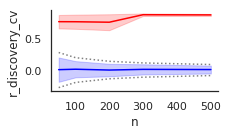

In [467]:
sns.set(rc={"figure.figsize":(3, 1.5)})
sns.set_style("white")

df = pd.read_csv('results_null_PCA_SVR.csv')

num_perm = 1000


# helper functions to compoute conf. intervals for correlation
def r_to_z(r):
    return math.log((1 + r) / (1 - r)) / 2.0

def z_to_r(z):
    e = math.exp(2 * z)
    return (e - 1) / (e + 1)

def r_confidence_interval(r, alpha, n):
    z = r_to_z(r)
    se = 1.0 / math.sqrt(n - 3)
    z_crit = stats.norm.ppf((1 + alpha)/2)  # 2-tailed z critical value

    lo = z - z_crit * se
    hi = z + z_crit * se
    # Return a sequence
    return (z_to_r(lo), z_to_r(hi))

r_ci_lo = [r_confidence_interval(0, 0.95, n=n)[0] for n in df.n.unique()]
r_ci_hi = [r_confidence_interval(0, 0.95, n=n)[1] for n in df.n.unique()]

sns.lineplot(x='n', y='r_discovery_cv', data=df, ci='sd', color="blue")
sns.lineplot(x='n', y='r_discovery_overfit', data=df, ci='sd', color="red")
sns.lineplot(x=df.n.unique(), y=r_ci_lo, linestyle='dotted', color='gray')
sns.lineplot(x=df.n.unique(), y=r_ci_hi, linestyle='dotted', color='gray')
sns.despine()
plt.savefig('fig/null_biased_vs_unbiased.pdf')

<AxesSubplot:xlabel='r_discovery_cv', ylabel='Count'>

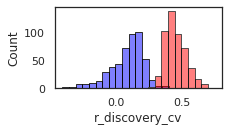

In [468]:
df = pd.read_csv('results_null_PCA_SVR.csv')

binwidth = 0.05

sns.histplot(tmp.r_discovery_cv, color='blue', alpha=0.5, binwidth=binwidth)
sns.histplot(tmp.r_discovery_cv, color='black',fill=False, binwidth=binwidth)

sns.histplot(tmp.r_discovery_overfit, color='red', alpha=0.5, binwidth=binwidth)
sns.histplot(tmp.r_discovery_overfit, color='black',fill=False, binwidth=binwidth)

# Replication Probabilities

PCA-SVR, pearson

IndexError: cannot do a non-empty take from an empty axes.

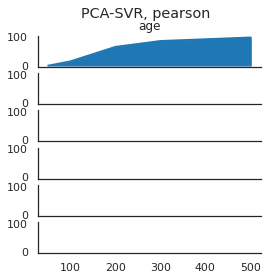

In [528]:
import numpy as np
sns.set(rc={"figure.figsize":(4, 4)})
sns.set_style("white")
# Replicability of:
feature = 'netmats_pearson'
model = "PCA_SVR"
df = pd.read_csv('results_' + model + '.csv')
df_null = pd.read_csv('results_null_' + model + '.csv')

fig, axes = plt.subplots(6, sharex=True, sharey=True)
cols = ['tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:red', 'tab:cyan']
for i_target, target in enumerate(['age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'Flanker_AgeAdj', 'CardSort_AgeAdj', 'PicSeq_AgeAdj']):
    tmp = df.loc[(df.target==target) & (df.connectivity==feature)]
    tmp_null = df_null.loc[(df_null.target==target) & (df_null.connectivity==feature)]

    alpha=0.05
    replication_prob = np.zeros(len(tmp.n.unique()))
    for i, n in enumerate(tmp.n.unique()):
            tmp2 = tmp[tmp.n == n]
            tmp2_null = tmp_null[tmp_null.n == n]
            r_discovery_threshold = np.quantile(tmp2_null.r_discovery_cv.dropna(), 1-alpha)

            if (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() == 0:
                replication_prob[i] = np.nan
            else:
                 #      #(significant replications among significant discoveries)     / # significant replications
                replication_prob[i] = (tmp2.loc[tmp2['r_discovery_cv']>=r_discovery_threshold,'p_replication']<alpha).sum() / (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() * 100
    sns.lineplot(x=tmp.n.unique(), y=replication_prob, color=cols[i_target], ax=axes[i_target]).set(title=target)
    axes[i_target].fill_between(tmp.n.unique(), replication_prob, color=cols[i_target])
    sns.despine()
    fig.suptitle('PCA-SVR, pearson')
    plt.savefig('fig/replication_' + feature + '_' + model + '.pdf')

Ridge, pearson

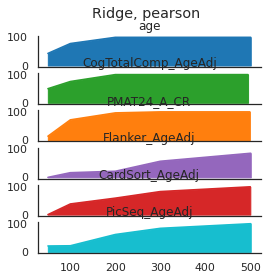

In [529]:
import numpy as np
sns.set(rc={"figure.figsize":(4, 4)})
sns.set_style("white")
# Replicability of:
feature = 'netmats_pearson'
model = "Ridge"
df = pd.read_csv('results_' + model + '.csv')
df_null = pd.read_csv('results_null_' + model + '.csv')

fig, axes = plt.subplots(6, sharex=True, sharey=True)
cols = ['tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:red', 'tab:cyan']
for i_target, target in enumerate(['age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'Flanker_AgeAdj', 'CardSort_AgeAdj', 'PicSeq_AgeAdj']):
    tmp = df.loc[(df.target==target) & (df.connectivity==feature)]
    tmp_null = df_null.loc[(df_null.target==target) & (df_null.connectivity==feature)]

    alpha=0.05
    replication_prob = np.zeros(len(tmp.n.unique()))
    for i, n in enumerate(tmp.n.unique()):
            tmp2 = tmp[tmp.n == n]
            tmp2_null = tmp_null[tmp_null.n == n]
            r_discovery_threshold = np.quantile(tmp2_null.r_discovery_cv.dropna(), 1-alpha)

            if (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() == 0:
                replication_prob[i] = np.nan
            else:
                 #      #(significant replications among significant discoveries)     / # significant replications
                replication_prob[i] = (tmp2.loc[tmp2['r_discovery_cv']>=r_discovery_threshold,'p_replication']<alpha).sum() / (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() * 100
    sns.lineplot(x=tmp.n.unique(), y=replication_prob, color=cols[i_target], ax=axes[i_target]).set(title=target)
    #fig.xlim((50,500))
    #fig.ylim((0,100))
    axes[i_target].fill_between(tmp.n.unique(), replication_prob, color=cols[i_target])
    sns.despine()
    fig.suptitle('Ridge, pearson')
    plt.savefig('fig/replication_' + feature + '_' + model + '.pdf')

PCA-SVR parcor

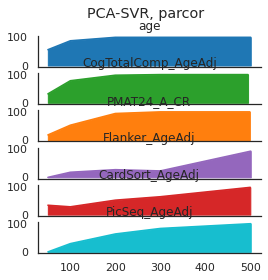

In [530]:
import numpy as np
sns.set(rc={"figure.figsize":(4, 4)})
sns.set_style("white")
# Replicability of:
feature = 'netmats_parcor'
model = "PCA_SVR"
df = pd.read_csv('results_' + model + '.csv')
df_null = pd.read_csv('results_null_' + model + '.csv')

fig, axes = plt.subplots(6, sharex=True, sharey=True)
cols = ['tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:red', 'tab:cyan']
for i_target, target in enumerate(['age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'Flanker_AgeAdj', 'CardSort_AgeAdj', 'PicSeq_AgeAdj']):
    tmp = df.loc[(df.target==target) & (df.connectivity==feature)]
    tmp_null = df_null.loc[(df_null.target==target) & (df_null.connectivity==feature)]

    alpha=0.05
    replication_prob = np.zeros(len(tmp.n.unique()))
    for i, n in enumerate(tmp.n.unique()):
            tmp2 = tmp[tmp.n == n]
            tmp2_null = tmp_null[tmp_null.n == n]
            r_discovery_threshold = np.quantile(tmp2_null.r_discovery_cv.dropna(), 1-alpha)

            if (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() == 0:
                replication_prob[i] = np.nan
            else:
                 #      #(significant replications among significant discoveries)     / # significant replications
                replication_prob[i] = (tmp2.loc[tmp2['r_discovery_cv']>=r_discovery_threshold,'p_replication']<alpha).sum() / (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() * 100
    sns.lineplot(x=tmp.n.unique(), y=replication_prob, color=cols[i_target], ax=axes[i_target]).set(title=target)
    axes[i_target].fill_between(tmp.n.unique(), replication_prob, color=cols[i_target])
    sns.despine()
    fig.suptitle('PCA-SVR, parcor')
    plt.savefig('fig/replication_' + feature + '_' + model + '.pdf')

Ridge, parcor

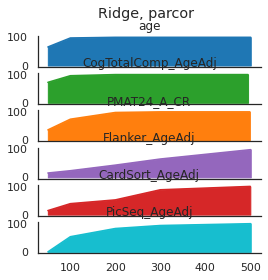

In [531]:
import numpy as np
sns.set(rc={"figure.figsize":(4, 4)})
sns.set_style("white")
# Replicability of:
feature = 'netmats_parcor'
model = "Ridge"
df = pd.read_csv('results_' + model + '.csv')
df_null = pd.read_csv('results_null_' + model + '.csv')

fig, axes = plt.subplots(6, sharex=True, sharey=True)
cols = ['tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:red', 'tab:cyan']
for i_target, target in enumerate(['age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'Flanker_AgeAdj', 'CardSort_AgeAdj', 'PicSeq_AgeAdj']):
    tmp = df.loc[(df.target==target) & (df.connectivity==feature)]
    tmp_null = df_null.loc[(df_null.target==target) & (df_null.connectivity==feature)]

    alpha=0.05
    replication_prob = np.zeros(len(tmp.n.unique()))
    for i, n in enumerate(tmp.n.unique()):
            tmp2 = tmp[tmp.n == n]
            tmp2_null = tmp_null[tmp_null.n == n]
            r_discovery_threshold = np.quantile(tmp2_null.r_discovery_cv.dropna(), 1-alpha)

            if (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() == 0:
                replication_prob[i] = np.nan
            else:
                 #      #(significant replications among significant discoveries)     / # significant replications
                replication_prob[i] = (tmp2.loc[tmp2['r_discovery_cv']>=r_discovery_threshold,'p_replication']<alpha).sum() / (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() * 100
    sns.lineplot(x=tmp.n.unique(), y=replication_prob, color=cols[i_target], ax=axes[i_target]).set(title=target)
    axes[i_target].fill_between(tmp.n.unique(), replication_prob, color=cols[i_target])
    sns.despine()
    fig.suptitle('Ridge, parcor')
    plt.savefig('fig/replication_' + feature + '_' + model + '.pdf')

# Multivariate Statistical Power

IndexError: cannot do a non-empty take from an empty axes.

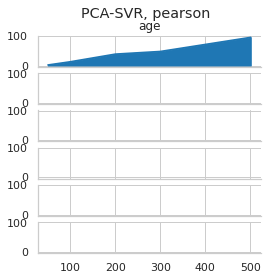

In [532]:
import numpy as np
sns.set(rc={"figure.figsize":(4, 4)})
sns.set_style("whitegrid")
# Replicability of:
feature = 'netmats_pearson'
model = "PCA_SVR"
df = pd.read_csv('results_' + model + '.csv')
df_null = pd.read_csv('results_null_' + model + '.csv')

fig, axes = plt.subplots(6, sharex=True, sharey=True)
cols = ['tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:red', 'tab:cyan']
for i_target, target in enumerate(['age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'Flanker_AgeAdj', 'CardSort_AgeAdj', 'PicSeq_AgeAdj']):
    tmp = df.loc[(df.target==target) & (df.connectivity==feature)]
    tmp_null = df_null.loc[(df_null.target==target) & (df_null.connectivity==feature)]

    alpha=0.05
    power = np.zeros(len(tmp.n.unique()))
    for i, n in enumerate(tmp.n.unique()):
            tmp2 = tmp[tmp.n == n]
            tmp2_null = tmp_null[tmp_null.n == n]
            r_discovery_threshold = np.quantile(tmp2_null.r_discovery_cv.dropna(), 1-alpha)

            power[i] = (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() / len(tmp2['r_discovery_cv']) * 100

    sns.lineplot(x=tmp.n.unique(), y=power, color=cols[i_target], ax=axes[i_target]).set(title=target)
    #fig.xlim((50,500))
    #fig.ylim((0,100))
    axes[i_target].fill_between(tmp.n.unique(), power, color=cols[i_target])
    sns.despine()
    fig.suptitle('PCA-SVR, pearson')
    plt.savefig('fig/replication_' + feature + '_' + model + '.pdf')

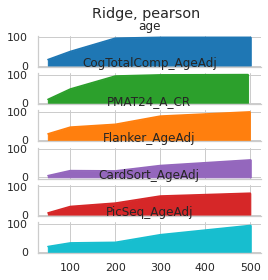

In [533]:
import numpy as np
sns.set(rc={"figure.figsize":(4, 4)})
sns.set_style("whitegrid")
# Replicability of:
feature = 'netmats_pearson'
model = "Ridge"
df = pd.read_csv('results_' + model + '.csv')
df_null = pd.read_csv('results_null_' + model + '.csv')

fig, axes = plt.subplots(6, sharex=True, sharey=True)
cols = ['tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:red', 'tab:cyan']
for i_target, target in enumerate(['age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'Flanker_AgeAdj', 'CardSort_AgeAdj', 'PicSeq_AgeAdj']):
    tmp = df.loc[(df.target==target) & (df.connectivity==feature)]
    tmp_null = df_null.loc[(df_null.target==target) & (df_null.connectivity==feature)]

    alpha=0.05
    power = np.zeros(len(tmp.n.unique()))
    for i, n in enumerate(tmp.n.unique()):
            tmp2 = tmp[tmp.n == n]
            tmp2_null = tmp_null[tmp_null.n == n]
            r_discovery_threshold = np.quantile(tmp2_null.r_discovery_cv.dropna(), 1-alpha)

            power[i] = (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() / len(tmp2['r_discovery_cv']) * 100

    sns.lineplot(x=tmp.n.unique(), y=power, color=cols[i_target], ax=axes[i_target]).set(title=target)
    #fig.xlim((50,500))
    #fig.ylim((0,100))
    axes[i_target].fill_between(tmp.n.unique(), power, color=cols[i_target])
    sns.despine()
    fig.suptitle('Ridge, pearson')
    plt.savefig('fig/replication_' + feature + '_' + model + '.pdf')

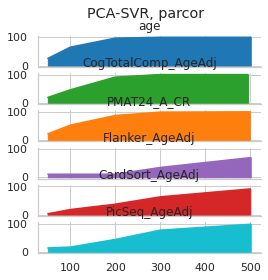

In [534]:
import numpy as np
sns.set(rc={"figure.figsize":(4, 4)})
sns.set_style("whitegrid")
# Replicability of:
feature = 'netmats_parcor'
model = "PCA_SVR"
df = pd.read_csv('results_' + model + '.csv')
df_null = pd.read_csv('results_null_' + model + '.csv')

fig, axes = plt.subplots(6, sharex=True, sharey=True)
cols = ['tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:red', 'tab:cyan']
for i_target, target in enumerate(['age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'Flanker_AgeAdj', 'CardSort_AgeAdj', 'PicSeq_AgeAdj']):
    tmp = df.loc[(df.target==target) & (df.connectivity==feature)]
    tmp_null = df_null.loc[(df_null.target==target) & (df_null.connectivity==feature)]

    alpha=0.05
    power = np.zeros(len(tmp.n.unique()))
    for i, n in enumerate(tmp.n.unique()):
            tmp2 = tmp[tmp.n == n]
            tmp2_null = tmp_null[tmp_null.n == n]
            r_discovery_threshold = np.quantile(tmp2_null.r_discovery_cv.dropna(), 1-alpha)

            power[i] = (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() / len(tmp2['r_discovery_cv']) * 100

    sns.lineplot(x=tmp.n.unique(), y=power, color=cols[i_target], ax=axes[i_target]).set(title=target)
    axes[i_target].fill_between(tmp.n.unique(), power, color=cols[i_target])
    sns.despine()
    fig.suptitle('PCA-SVR, parcor')
    plt.savefig('fig/replication_' + feature + '_' + model + '.pdf')

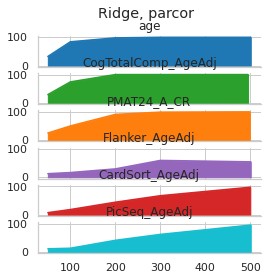

In [535]:
import numpy as np
sns.set(rc={"figure.figsize":(4, 4)})
sns.set_style("whitegrid")
# Replicability of:
feature = 'netmats_parcor'
model = "Ridge"
df = pd.read_csv('results_' + model + '.csv')
df_null = pd.read_csv('results_null_' + model + '.csv')

fig, axes = plt.subplots(6, sharex=True, sharey=True)
cols = ['tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:red', 'tab:cyan']
for i_target, target in enumerate(['age', 'CogTotalComp_AgeAdj', 'PMAT24_A_CR', 'Flanker_AgeAdj', 'CardSort_AgeAdj', 'PicSeq_AgeAdj']):
    tmp = df.loc[(df.target==target) & (df.connectivity==feature)]
    tmp_null = df_null.loc[(df_null.target==target) & (df_null.connectivity==feature)]

    alpha=0.05
    power = np.zeros(len(tmp.n.unique()))
    for i, n in enumerate(tmp.n.unique()):
            tmp2 = tmp[tmp.n == n]
            tmp2_null = tmp_null[tmp_null.n == n]
            r_discovery_threshold = np.quantile(tmp2_null.r_discovery_cv.dropna(), 1-alpha)

            power[i] = (tmp2['r_discovery_cv']>=r_discovery_threshold).sum() / len(tmp2['r_discovery_cv']) * 100

    sns.lineplot(x=tmp.n.unique(), y=power, color=cols[i_target], ax=axes[i_target]).set(title=target)
    #fig.xlim((50,500))
    #fig.ylim((0,100))
    axes[i_target].fill_between(tmp.n.unique(), power, color=cols[i_target])
    sns.despine()
    fig.suptitle('Ridge, parcor')
    plt.savefig('fig/replication_' + feature + '_' + model + '.pdf')

# Learning Curves

In [ ]:
def plot_learning_curve(target, feature, df, filetag=None):
    sns.set(rc={"figure.figsize":(3, 2)})
    sns.set_style("white")
    tmp = df.loc[(df.target==target) & (df.connectivity==feature)]

    sns.lineplot(x='n', y='r_discovery_cv', data=tmp, ci="sd")
    sns.lineplot(x='n', y='r_discovery_overfit', data=tmp, ci="sd")
    sns.lineplot(x='n', y='r_replication', data=tmp, ci="sd")
    plt.ylim((-0.2, 1.01))
    sns.despine()
    if filetag:
        plt.savefig('fig/learning_curve_' + target + '_' + feature + '_' + filetag + '.pdf')

In [ ]:
df = pd.read_csv('results_PCA_SVR.csv')
plot_learning_curve(target='CogTotalComp_AgeAdj', feature='netmats_pearson', df=df, filetag='pca-svr')

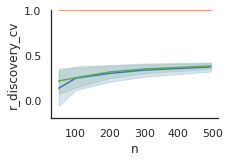

In [504]:
df = pd.read_csv('results_Ridge.csv')
plot_learning_curve(target='CogTotalComp_AgeAdj', feature='netmats_pearson', df=df, filetag='ridge')

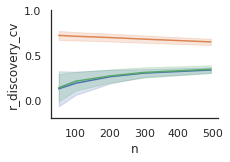

In [505]:
df = pd.read_csv('results_PCA_SVR.csv')
plot_learning_curve(target='CogTotalComp_AgeAdj', feature='netmats_parcor', df=df, filetag='pca-svr')

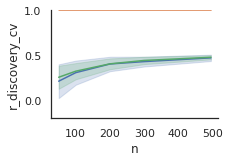

In [507]:
df = pd.read_csv('results_Ridge.csv')
plot_learning_curve(target='CogTotalComp_AgeAdj', feature='netmats_parcor', df=df, filetag='ridge')